# Исследование стартапов

Проект направлен на исследование стартапов с целью создания модели оценки и развития для финансовой компании, планирующей выход на инвестиционный рынок. Основное внимание уделяется анализу исторических данных о стартапах, их финансировании, приобретениях, а также образовании и опыте основателей. Исследование поможет выявить перспективные направления для инвестиций и разработать стратегию покупки, развития и последующей продажи стартапов.

## Цели проекта:

1. Изучение предоставленных данных о стартапах, их финансировании, приобретениях и участниках.
2. Определение факторов, влияющих на успешность стартапов, таких как категория, страна, объем финансирования и образование основателей.
3. Создание модели для оценки перспективности стартапов и рекомендаций по инвестициям.
4. Формирование стратегии для финансовой компании, включая этапы покупки, развития и продажи стартапов.

##  Задачи проекта:

1. Загрузка и предварительный анализ данных, исправление названий столбцов, проверка на пропуски и аномалии.
2. Анализ распределения стартапов по категориям, странам, статусу и другим параметрам.
3. Построение графиков и диаграмм для наглядного представления данных.
4. Изучение взаимосвязей между различными параметрами, такими как объем финансирования и успешность стартапа.
5. На основе анализа данных предложить оптимальные направления для инвестиций и стратегии работы с ними.
Проект учитывает неполноту данных, поэтому особое внимание уделяется аккуратности выводов и оценке возможных искажений.


## Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv


### Вывод общей информации, исправление названия столбцов

In [2]:

# Загружаем библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [3]:
# Загружем все данные по проекту
PATH = "https://code.s3.yandex.net/datasets/"
df_company_and_rounds = pd.read_csv(PATH + 'company_and_rounds.csv')
df_acquisition = pd.read_csv(PATH + 'acquisition.csv')
df_people = pd.read_csv(PATH + 'people.csv')
df_education = pd.read_csv(PATH + 'education.csv')
df_degrees = pd.read_csv(PATH + 'degrees.csv')
df_fund = pd.read_csv(PATH + 'fund.csv')

##### Выведем информацию по каждому датасету

In [4]:
# Вывод информации по таблице "company_and_rounds"
df_company_and_rounds.info()
df_company_and_rounds.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaN,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaN,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaN,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaN,NaN,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Вывод информации по таблице "acquisition"
df_acquisition.info()
df_acquisition.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01


In [6]:
# Вывод информации по таблице "people"
df_people.info()
df_people.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


In [7]:
# Вывод информации по таблице "education"
df_education.info()
df_education.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


In [8]:
# Вывод информации по таблице "degrees"
df_degrees.info()
df_degrees.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


Датасеты:

- <b>df_company_and_rounds:</b> данные о компаниях и раундах финансирования, содержит 22 столбца, 217469 строки. Для founded_at (дата основания) и closed_at (закрытие компании) меняем тип данных на datetime, company_id в тип Int64. Дублирующие столбцы (company_ID, company_id) оставляем, один переименовываем. 
- <b> df_acquisition:</b> информация о покупках одних компаний другими (6 столбцов, 9406 строк). Поле acquired_at приводим в тип данных datetime.
- <b>df_people:</b> сотрудники (5 столбцов, 226708 строк).
- <b>df_education:</b> образование сотрудников (4 столбца, 109609 строк). Поле graduated_at приводим в тип данных datetime. Преобразуем название столбца 'instituition' в 'institution'.
- <b>df_degrees:</b> тип образования сотрудников (4 столбца, 109609 строк). Пропуски в degree_type и subject заменяем на "нет данных".

### Смена типов и анализ пропусков

#### Работаем с таблицей company_and_rounds

In [9]:
# Выводим количество пропущенных строк в датафрейме "company_and_rounds"
df_company_and_rounds.isna().sum()

company  ID                 302
name                        303
category  code            73888
status                      302
founded  at              107818
closed  at               214325
domain                    70615
network  username        122240
country  code            109167
investment  rounds          302
funding  rounds             302
funding  total              302
milestones                  302
funding  round  id       164846
company  id              164846
funded  at               165094
funding  round  type     164846
raised  amount           164846
pre  money  valuation    164846
participants             164846
is  first  round         164846
is  last  round          164846
dtype: int64

In [10]:
# Подсчитываем процент строк с пропусками в датафрейме "company_and_rounds"
df_company_and_rounds.isna().sum() / len(df_company_and_rounds) * 100

company  ID               0.138676
name                      0.139135
category  code           33.928752
status                    0.138676
founded  at              49.509124
closed  at               98.416248
domain                   32.425818
network  username        56.131586
country  code            50.128574
investment  rounds        0.138676
funding  rounds           0.138676
funding  total            0.138676
milestones                0.138676
funding  round  id       75.695905
company  id              75.695905
funded  at               75.809784
funding  round  type     75.695905
raised  amount           75.695905
pre  money  valuation    75.695905
participants             75.695905
is  first  round         75.695905
is  last  round          75.695905
dtype: float64

<Figure size 300x100 with 0 Axes>

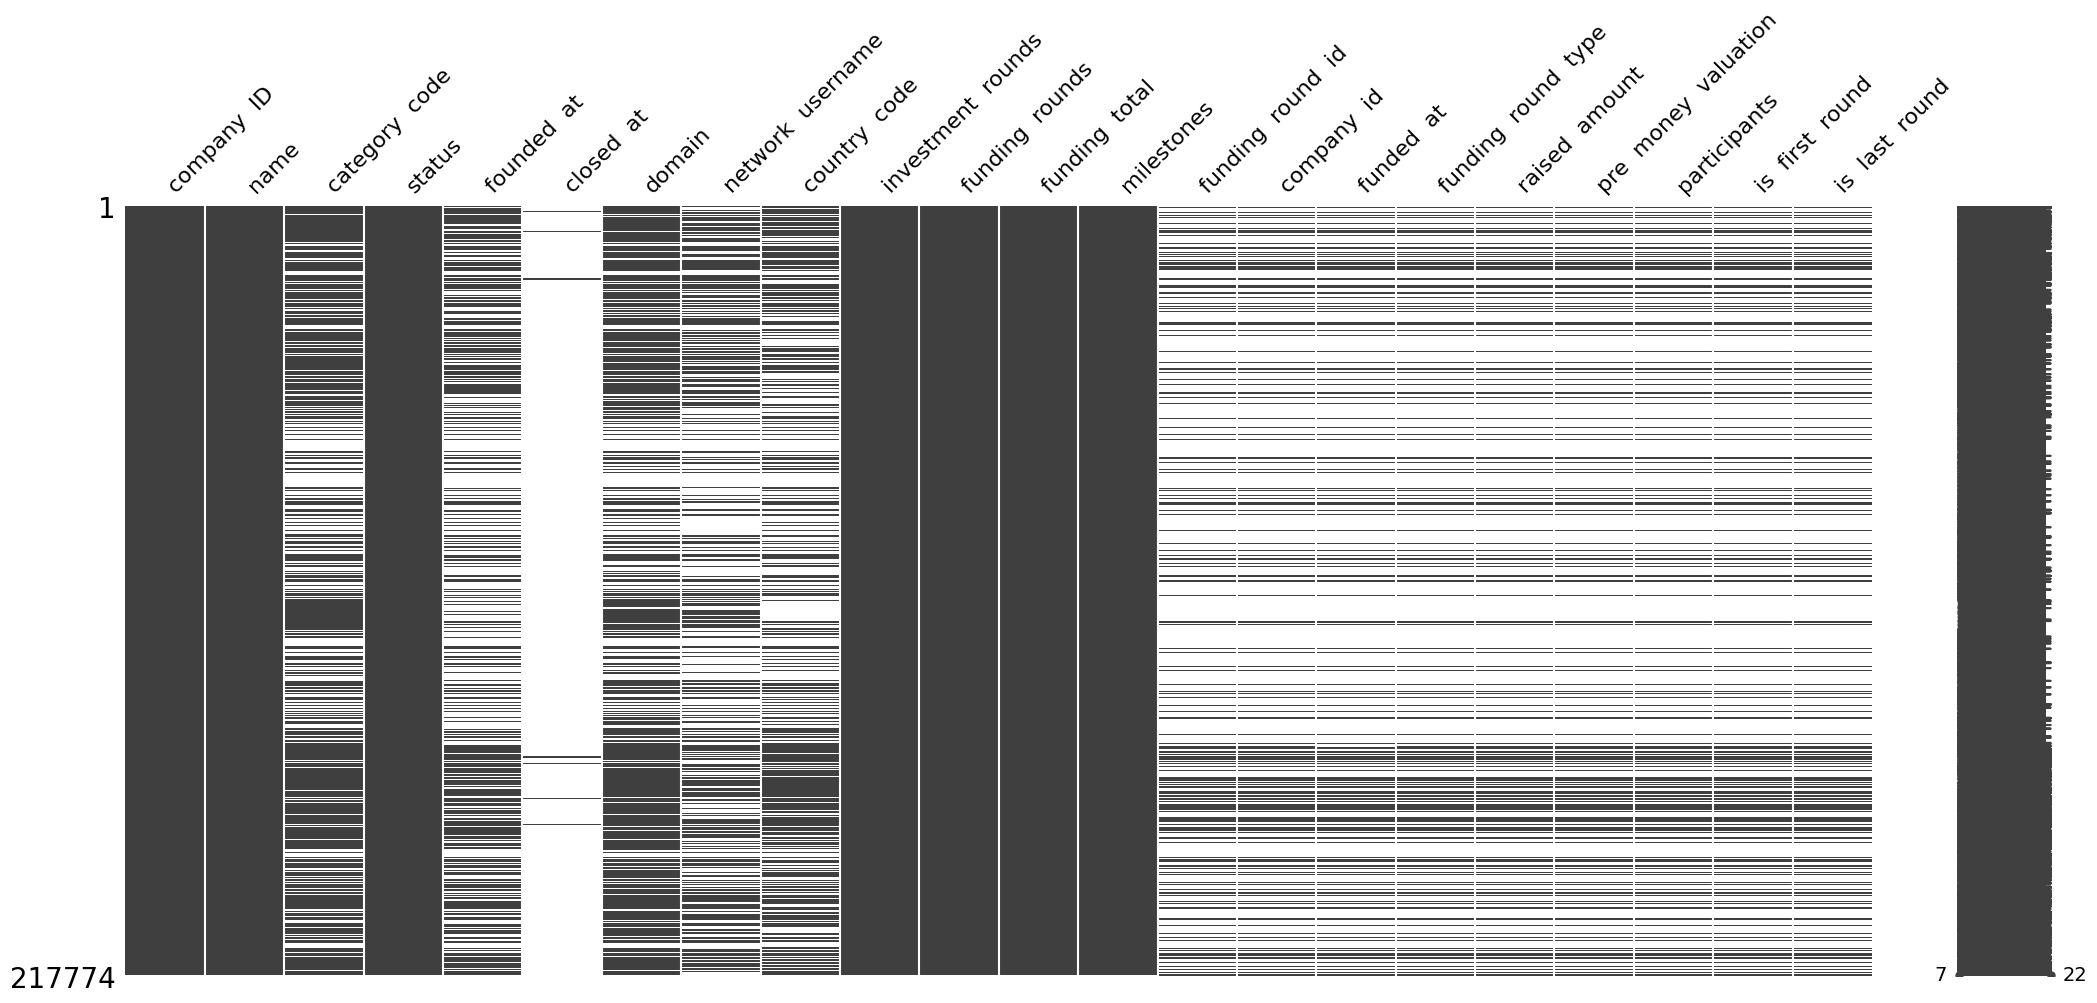

In [11]:
# Визуализируем данные, для лучшего понимания количества пропусков в датафрейме "company_and_rounds"
plt.figure(figsize=(3, 1))
msno.matrix(df_company_and_rounds)
plt.show()

In [12]:
# Приведем названия столбцов к стилю snake_case
df_company_and_rounds.columns = df_company_and_rounds.columns.str.replace('  ', '_')
df_company_and_rounds

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0
217770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0
217771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0
217772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0


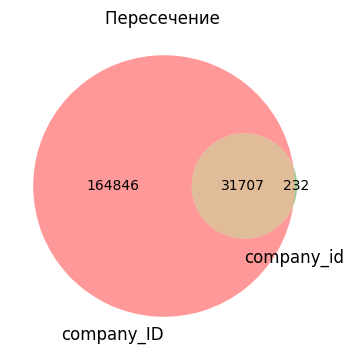

In [13]:
# Строим диагармму Венна, для понимания насколько совпадают значения двух столбцов с идентичным наименованием в датафрейме "company_and_rounds"
first_id = set(df_company_and_rounds['company_ID'].dropna().unique())
second_id = set(df_company_and_rounds['company_id'].dropna().unique())

# Строим диаграмму Венна
plt.figure(figsize=(7, 4))
venn2([first_id, second_id], set_labels=('company_ID', 'company_id'))

# Отображаем график
plt.title("Пересечение ")
plt.show()

In [14]:
# Приводим столбцы с датами к соответствующему типу данных 'datetime64'
df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'], format='%Y-%m-%d')
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'], format='%Y-%m-%d')
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'], format='%Y-%m-%d')

# Проверка структуры DataFrame
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [15]:
# Преобразование столбца "company_id" в объект int
df_company_and_rounds['company_id'] = df_company_and_rounds['company_id'].astype('Int64')

# Проверка структуры DataFrame
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [16]:
 # Проверяем таблицу на дубликаты
df_company_and_rounds.duplicated().sum()


np.int64(0)

In [17]:
 # Проверяем таблицу на неявные дубликаты
df_company_and_rounds.duplicated(subset='company_ID').sum()

np.int64(21220)

#### Выводы по таблице company_and_rounds:

Приведены наименования столбцов к единому стилю snake_case.

Преобразованы типы данных в полях founded_at (дата основания) и closed_at (закрытие компании) к формату datetime, а также тип данных в столбце company_id приведён к Int64.

Выявлено наибольшее количество пропущенных значений начиная со столбца funding_round_id.

Явные дубликаты в датафрейме отсутствуют. Однако, обнаружено 20 919 неявных дубликатов по полю company_ID, что объясняется многократностью операций одной и той же компании, каждая из которых фиксируется отдельной записью.

В столбце company_ID выявлено 164 846 уникальных значений, тогда как в столбце company_id — только 232 уникальных значения. Общее пересечение идентификаторов составляет 31 707 записей, что подтверждает наличие совпадений, несмотря на высокую долю пропусков в столбце company_id.

Предварительный анализ указывает на то, что рассматриваемый датафрейм, вероятнее всего, получен путём объединения нескольких исходных таблиц.

#### Работаем с таблицей acquisition

In [18]:
# Выводим количество пропущенных строк в датафрейме "acquisition"
df_acquisition.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [19]:
# Подсчитываем процент строк с пропусками в датафрейме "acquisition"
df_acquisition.isna().sum() / len(df_company_and_rounds) * 100

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               3.478836
price_amount            0.000000
acquired_at             0.013317
dtype: float64

In [20]:
# Преобразование столбца "acquired_at" в объект datetime
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [21]:
 # Проверяем таблицу на дубликаты
df_acquisition.duplicated().sum()

np.int64(0)

In [22]:
 # Проверяем таблицу на неявные дубликаты
df_acquisition.duplicated(subset='id').sum()

np.int64(0)

#### Выводы по таблице cacquisition:

Пропуски в поле term_code составляют всего 3.5%, что незначительно, поэтому решено оставить данные без изменений.

Анализ показал отсутствие явных и неявных дублирующихся записей в данных.

Тип данных в поле acquired_at успешно преобразован в формат datetime.

#### Работаем с таблицей people

In [23]:
# Выводим количество пропущенных строк в датафрейме "people"
df_people.isna().sum()

id                       0
first_name               9
last_name                4
company_id          192094
network_username    187842
dtype: int64

In [24]:
# Подсчитываем процент строк с пропусками в датафрейме "people"
df_people.isna().sum() / len(df_company_and_rounds) * 100

id                   0.000000
first_name           0.004133
last_name            0.001837
company_id          88.207959
network_username    86.255476
dtype: float64

In [25]:
 # Проверяем таблицу на дубликаты
df_people.duplicated().sum()

np.int64(0)

In [26]:
 # Проверяем таблицу на неявные дубликаты
df_people.duplicated(subset='id').sum()

np.int64(1)

In [27]:
df_people =df_people.drop_duplicates(subset='id') # удаляем дубликат по столбцу id
df_people.duplicated(subset='id').sum()

np.int64(0)

#### Выводы по таблице people:

Обнаружено значительное количество пропусков в столбцах company_id (88.2%) и network_username (86.3%), которые на данном этапе решено оставить без изменений ввиду планов по последующему присоединению дополнительных таблиц.

Анализ подтвердил отсутствие явных дубликатов в данных. Тем не менее выявлен один неявный дубликат по идентификатору сотрудника, который целесообразно удалить для повышения точности анализа.

#### Работаем с таблицей education

In [28]:
# Выводим количество пропущенных строк в датафрейме "education"
df_education.isna().sum()


id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [29]:
# Подсчитываем процент строк с пропусками в датафрейме "education"
df_education.isna().sum() / len(df_company_and_rounds) * 100

id               0.000000
person_id        0.000000
instituition     0.025256
graduated_at    23.674084
dtype: float64

In [30]:
# Преобразуем название столбца 'instituition' в 'institution'
df_education.rename(columns={'instituition': 'institution'}, inplace=True)

# Проверяем изменения
df_education

,id,person_id,institution,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaN
109606,109607,268527,South China University of Technology,NaN
109607,109608,268527,Clarkson University,NaN
109608,109609,268528,Colorado State University,NaN


In [31]:
# Преобразование столбца "graduated_at" в объект datetime
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   institution   109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [32]:
 # Проверяем таблицу на дубликаты
df_education.duplicated().sum()

np.int64(0)

In [33]:
 # Проверяем таблицу на неявные дубликаты
df_education.duplicated(subset='id').sum()

np.int64(0)

#### Выводы по таблице education:

Пропуски в поле graduated_at составляют 23.7 %. На данном этапе решено оставить без изменений в связи с планами последующего присоединения дополнительных таблиц.

Название столбца 'instituition' было исправлено на 'institution'.

Тип данных в поле graduated_at успешно преобразован в формат datetime.

Анализ данных подтвердил отсутствие явных и скрытых дублирующих записей.

#### Работаем с таблицей df_degrees

In [34]:
# Выводим количество пропущенных строк в датафрейме "df_degrees"
df_degrees.isna().sum()

id                 0
object_id          0
degree_type    11221
subject        28312
dtype: int64

In [35]:
# Подсчитываем процент строк с пропусками в датафрейме "df_degrees"
df_degrees.isna().sum() / len(df_company_and_rounds) * 100

id              0.000000
object_id       0.000000
degree_type     5.152589
subject        13.000634
dtype: float64

In [36]:
# Убираем "p:@" у поля "object_id" для возможного следующего слияния
df_degrees['object_id'] = df_degrees['object_id'].str.replace('p:', '')
df_degrees

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"
...,...,...,...,...
109605,109606,268589,CPA,NaN
109606,109607,268527,MS & BS,Engineering
109607,109608,268527,PhD,Engineering
109608,109609,268528,B.S.,Electrical Engineering


In [37]:
 # Проверяем таблицу на дубликаты
df_degrees.duplicated().sum()

np.int64(0)

In [38]:
 # Проверяем таблицу на неявные дубликаты
df_degrees.duplicated(subset='id').sum()

np.int64(0)

#### Выводы по таблице degrees:

Пропуски в полях degree_type (5.2%) и subject (13%) являются незначительными. Решено оставить их без изменений на данном этапе в связи с предстоящей интеграцией дополнительных таблиц.

Удалено префиксное обозначение "p:@" в поле object_id для обеспечения совместимости при последующем слиянии данных.

Анализ данных подтвердил отсутствие явных и скрытых дубликатов.

## Предобработка данных, предварительное исследование

### Раунды финансирования по годам

In [39]:
# Создаем новый столбец с годами на основе funded_at
df_company_and_rounds['year'] = df_company_and_rounds['funded_at'].dt.year

# Считаем количество раундов и медиану raised_amount по каждому году
summary_df = df_company_and_rounds.groupby('year')['raised_amount'].agg(['count', 'median'])
summary_df.columns = ['total_rounds', 'typical_founding_size']

# Оставляем только годы с количеством раундов больше 50
filtered_summary_df = summary_df.query('total_rounds > 50')

# Выводим результат
print(filtered_summary_df)

        total_rounds  typical_founding_size
year                                       
1999.0            76              2000000.0
2000.0           125              4200000.0
2001.0            96              3000000.0
2002.0           116              4200000.0
2003.0           159              3000000.0
2004.0           291              5000000.0
2005.0          1633              5500000.0
2006.0          2436              5000000.0
2007.0          3279              3973320.0
2008.0          3774              3110000.0
2009.0          4151              2000000.0
2010.0          6221              1602500.0
2011.0          9204              1200000.0
2012.0          9970              1000000.0
2013.0         11072              1200000.0


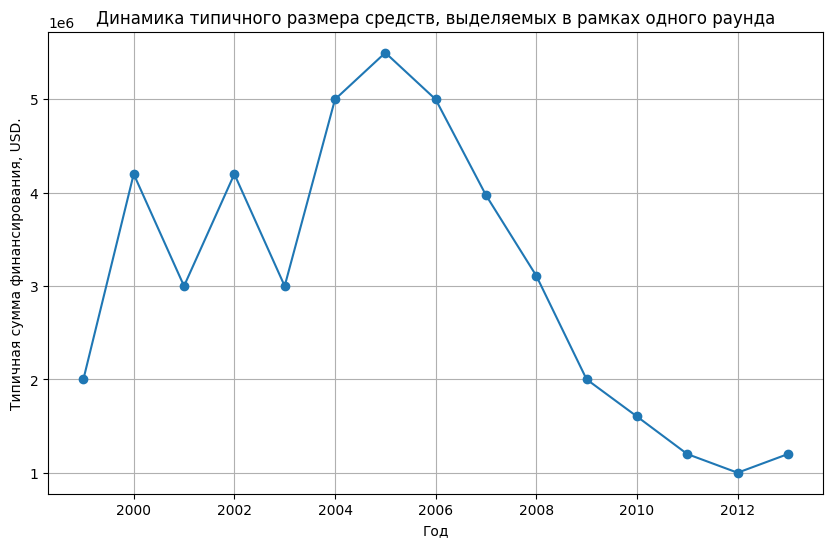

In [40]:
# Строим график
plt.figure(figsize=(10, 6))
plt.plot(filtered_summary_df.index, filtered_summary_df['typical_founding_size'], marker='o')
plt.title('Динамика типичного размера средств, выделяемых в рамках одного раунда')
plt.xlabel('Год')
plt.ylabel('Типичная сумма финансирования, USD.')
plt.grid(True)
plt.show()

<b>ВЫВОД: </b> Средний размер средств, привлечённых за один раунд, достиг пика в 2005 году.  Тогда как количество раундов финансирования показывают устойчивый рост вплоть до 2013 года


### Люди и их образование

Смотрим пересечение датафреймов People и  Education по полям  id (идентификатор сотрудника) и id_x ( идентификатор записи об образовании)

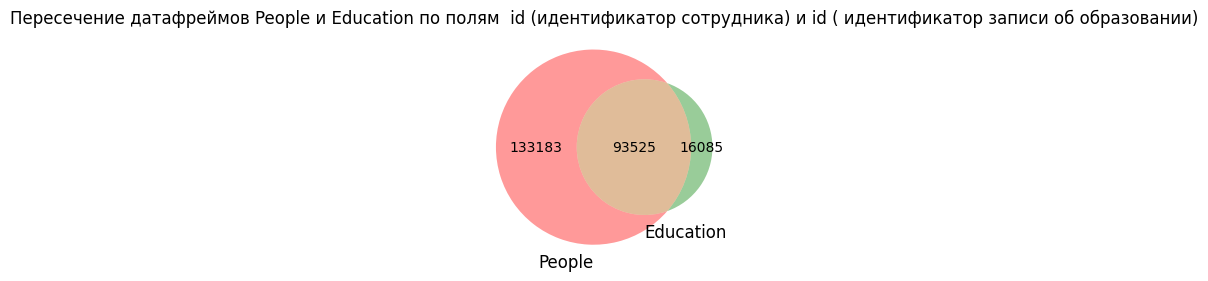

In [41]:
# Извлекаем уникальные значения из полей object_id и id_x
object_ids = set(df_people['id'].unique())
id_x_values = set(df_education['id'].unique())

# Находим пересечение множеств
intersection = object_ids.intersection(id_x_values)

# Определяем количество элементов в каждом множестве и их пересечении
only_in_people = len(object_ids.difference(intersection))
only_in_education = len(id_x_values.difference(intersection))
both = len(intersection)

# Строим диаграмму Венна
plt.figure(figsize=(5, 3))  # Устанавливаем размер фигуры
venn2(subsets=(only_in_people, only_in_education, both), set_labels=('People', 'Education'))
plt.title("Пересечение датафреймов People и Education по полям  id (идентификатор сотрудника) и id ( идентификатор записи об образовании)")
plt.show()

Видим, что 93 525 совпадений или 70%

In [42]:
# Объединяем датасеты "df_people" и "df_education"
people_and_education = df_people.merge(df_education, how = 'left', left_on = 'id', right_on = 'person_id')
people_and_education

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,institution,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267688,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267689,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267690,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267691,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


##### Оценим возможность для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.csv.

In [43]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [44]:
people_and_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267693 entries, 0 to 267692
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267693 non-null  int64         
 1   first_name        267684 non-null  object        
 2   last_name         267689 non-null  object        
 3   company_id        44788 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   institution       109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 18.4+ MB


##### Определяем по диаграмме Венна на сколько данные из таблиц  people_and_education и df_degrees возможно соединить 

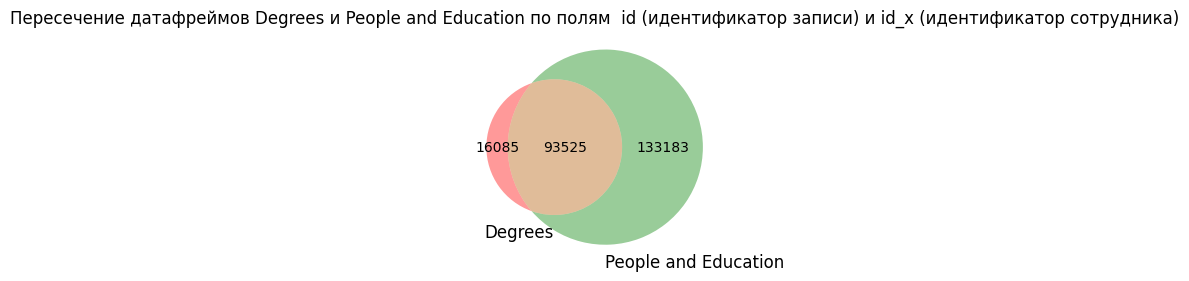

In [45]:
# Извлекаем уникальные значения из полей object_id и id_x
object_ids = set(df_degrees['id'].unique())
id_x_values = set(people_and_education['id_x'].unique())

# Находим пересечение множеств
intersection = object_ids.intersection(id_x_values)

# Определяем количество элементов в каждом множестве и их пересечении
only_in_degrees = len(object_ids.difference(intersection))
only_in_people_and_education = len(id_x_values.difference(intersection))
both = len(intersection)

# Строим диаграмму Венна
plt.figure(figsize=(5, 3))  # Устанавливаем размер фигуры
venn2(subsets=(only_in_degrees, only_in_people_and_education, both), set_labels=('Degrees', 'People and Education'))
plt.title("Пересечение датафреймов Degrees и People and Education по полям  id (идентификатор записи) и id_x (идентификатор сотрудника)")
plt.show()

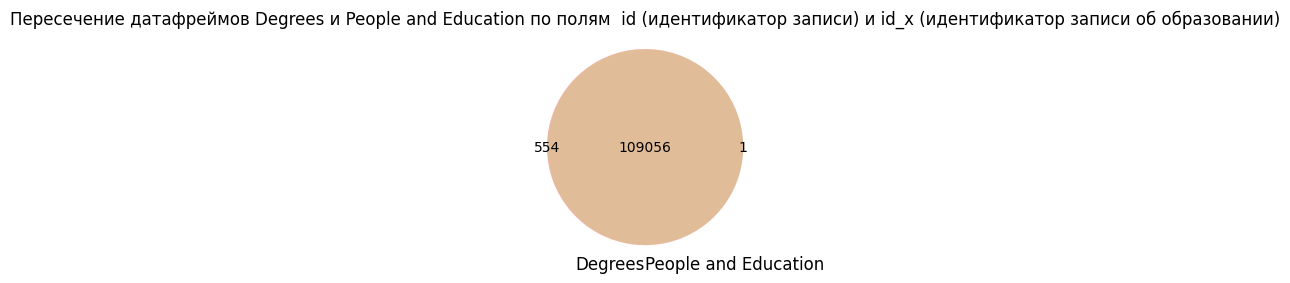

In [46]:
# Извлекаем уникальные значения из полей object_id и id_x
object_ids = set(df_degrees['id'].unique())
id_x_values = set(people_and_education['id_y'].unique())

# Находим пересечение множеств
intersection = object_ids.intersection(id_x_values)

# Определяем количество элементов в каждом множестве и их пересечении
only_in_degrees = len(object_ids.difference(intersection))
only_in_people_and_education = len(id_x_values.difference(intersection))
both = len(intersection)

# Строим диаграмму Венна
plt.figure(figsize=(5, 3))  # Устанавливаем размер фигуры
venn2(subsets=(only_in_degrees, only_in_people_and_education, both), set_labels=('Degrees', 'People and Education'))
plt.title("Пересечение датафреймов Degrees и People and Education по полям  id (идентификатор записи) и id_x (идентификатор записи об образовании)")
plt.show() 

In [47]:
merged_df_3 = pd.merge(people_and_education, df_degrees, left_on='id_x', right_on='id', how='inner')
merged_df_3

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,institution,graduated_at,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,10,6265,BS,Economics
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,100,938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1000,13098,MBA,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,10000,74038,MS,Applied Mathematics
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,100000,89666,MS,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107029,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997.0,University of Ottawa,1993-01-01,99997,257598,MS,NaN
107030,99997,Peter,Lalonde,83651.0,peterlalonde,69683.0,99997.0,Concordia University,1991-01-01,99997,257598,MS,NaN
107031,99997,Peter,Lalonde,83651.0,peterlalonde,69684.0,99997.0,John Abbott College,1989-01-01,99997,257598,MS,NaN
107032,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT,99998,23070,BS,NaN


#### Вывод: 
На основании проведенного анализа данных по столбцам таблицы Degrees и объединенной таблицы People and Education установлено, что объединение выбранных наборов данных не целесообразно, так как таблица Degrees имеет практически идентичную информацию.

In [48]:
# Определение количества сотрудников в каждой компании
company_sizes = people_and_education.groupby('company_id').size().reset_index(name='num_employees')

# Добавление количества сотрудников в общий DataFrame
merged_df = pd.merge(people_and_education, company_sizes, on='company_id')

# Разделение компаний на группы по количеству сотрудников
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]  
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']  

merged_df['company_size_group'] = pd.cut(merged_df['num_employees'], bins=bins, labels=labels)

# Присоединение таблицы с образованием
merged_df_2 = pd.merge(merged_df, df_degrees, left_on='id_x', right_on='id', how='left')

# Выведем результаты
merged_df_2.head(50)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,institution,graduated_at,num_employees,company_size_group,id,object_id,degree_type,subject
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,84,26+,10.0,6265,BS,Economics
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,14,11-25,100.0,938,BS,Computer Science
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,3,3,1000.0,13098,MBA,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,2,2,10000.0,74038,MS,Applied Mathematics
4,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006.0,MIT Sloan School of Management,2004-01-01,2,2,100006.0,257617,BA,Political Science
5,100018,Adam,Beckerman,148554.0,adam_beckerman,14433.0,100018.0,"Columbia University, Business School",2004-01-01,2,2,100018.0,89466,BA,NaN
6,100018,Adam,Beckerman,148554.0,adam_beckerman,14434.0,100018.0,"University of Maryland, College Park",1996-01-01,2,2,100018.0,89466,BA,NaN
7,100023,Neil,Chandran,81571.0,neilchandran,NaN,NaN,NaN,NaT,1,1,100023.0,257663,MS,NaN
8,100031,Sandeep,Hegde,81576.0,sandeephegde,14436.0,100031.0,Gogte Institute of Technology,2010-01-01,1,1,100031.0,177901,MS,NaN
9,100049,Mike,Cannady,63.0,NaN,32494.0,100049.0,New York University (NYU),NaT,18,11-25,100049.0,257710,BTECH,Electronics Engineering


In [49]:
# Группируем данные по company_size_group
grouped = merged_df_2.groupby('company_size_group')

# Считаем общее количество сотрудников в каждой группе
total_employees = grouped['id_x'].count().rename('total_employees')

# Считаем количество заполненных строк в столбце institution
filled_institution = grouped['institution'].apply(lambda x: x.notnull().sum()).rename('filled_institution')

# Объединяем результаты
result = pd.concat([total_employees, filled_institution], axis=1)

# Рассчитываем долю сотрудников без информации об образовании
result['percent_without_education'] = ((result['total_employees'] - result['filled_institution']) / result['total_employees']) * 100

# Выводим результаты
print(result)

                    total_employees  filled_institution  \
company_size_group                                        
1                             14149                5761   
2                              9470                7317   
3                              5571                4299   
4-5                            5559                4016   
6-10                           4885                3341   
11-25                          2832                1996   
26+                            2322                1879   

                    percent_without_education  
company_size_group                             
1                                   59.283342  
2                                   22.734952  
3                                   22.832526  
4-5                                 27.756791  
6-10                                31.606960  
11-25                               29.519774  
26+                                 19.078381  


/var/folders/nl/zfq2b41j5wn_jn9c4rynf46w0000gn/T/ipykernel_1007/2588690637.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = merged_df_2.groupby('company_size_group')


#### Вывод:
Анализ данных показывает значительную вариацию в доле сотрудников без информации об образовании в зависимости от размера компании. В самых маленьких компаниях, состоящих из 1 человека, эта доля составляет почти 60%, что существенно выше, чем в остальных группах. В средних и больших компаниях ("2"–"26+") доля сотрудников без информации об образовании колеблется в диапазоне от 20% до 32%, с наименьшим показателем в группе крупнейших компаний ("26+"). Это может указывать на улучшение качества заполнения данных об образовании сотрудников в более крупных организациях.

### Объединять или не объединять — вот в чём вопрос

Требуется провести сравнительный анализ содержания столбцов с названием network_username в двух различных наборах данных: company_and_rounds и people. В первом случае этот столбец представляет собой никнейм компании в сети, во втором — никнейм сотрудника в социальных сетях. Необходимо проверить, существует ли дублирующаяся информация между этими двумя столбцами, и оценить частоту совпадений. Кроме того, предстоит выяснить возможность использования этих столбцов для объединения данных.

In [50]:
df_company_and_rounds

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56454.0,282847,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56542.0,55477,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56543.0,55477,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56928.0,283492,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [51]:
df_people

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


In [52]:
df_fund

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...
11647,9997,Axel Johnson,1920-01-01,axeljohnson.com,NaN,USA,1,1,0
11648,9998,Liberty City Ventures,2012-07-01,libertycityventures.com,LCVentures,USA,5,5,0
11649,9999,CalSTRS,1913-07-01,calstrs.com,CalSTRS,USA,1,1,0
11650,11555,Haystack,2013-01-01,network.com::haystack_fund,haystack_fund,NaN,5,5,0


Пересекающиеся значения: {'switchcommerce', 'dgillesfr', nan, 'taniablackalln', 'priceride', 'yumedeals3', 'tefdigital', 'boonseo'}


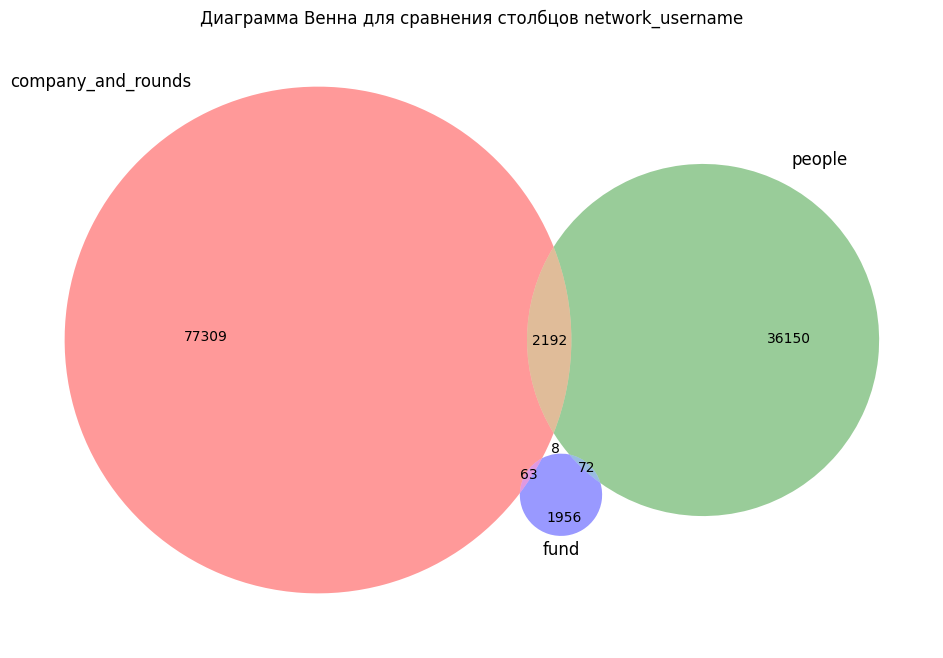

In [53]:
# Извлечение уникальных значений из столбцов network_username
company_network_usernames = set(df_company_and_rounds['network_username'].unique())
people_network_usernames = set(df_people['network_username'].unique())
fund_network_usernames = set(df_fund['network_username'].unique())  # Новый набор данных

# Нахождение пересечения множеств
intersection = company_network_usernames.intersection(people_network_usernames, fund_network_usernames)
print(f"Пересекающиеся значения: {intersection}")

# Построение диаграммы Венна
plt.figure(figsize=(12, 8))  
venn3(subsets=(company_network_usernames, people_network_usernames, fund_network_usernames),
      set_labels=('company_and_rounds', 'people', 'fund'))  # Добавлена метка для fund
plt.title("Диаграмма Венна для сравнения столбцов network_username")
plt.show()

In [54]:

# Извлечение уникальных значений из столбцов 'network_username'
unique_network_username_company_and_rounds = df_company_and_rounds['network_username'].unique()
unique_network_username_people = df_people['network_username'].unique()
unique_network_username_fund = df_fund['network_username'].unique()  

# Создание множеств уникальных значений
unique_network_username_company_and_rounds_set = set(unique_network_username_company_and_rounds)
unique_network_username_people_set = set(unique_network_username_people)
unique_network_username_fund_set = set(unique_network_username_fund)  

# Нахождение пересечения множеств (количество дубликатов)
duplicates_count = len(
    unique_network_username_company_and_rounds_set.intersection(
        unique_network_username_people_set, unique_network_username_fund_set))

# Подсчитываем общее количество уникальных значений в одном из датафреймов
total_unique_values = len(unique_network_username_company_and_rounds_set)

# Вычисляем процент дубликатов
duplicate_percentage = (duplicates_count / total_unique_values) * 100

# Выводим результат
print(f"Количество дубликатов: {duplicates_count}")
print(f"Процент дубликатов: {duplicate_percentage:.2f}%")

Количество дубликатов: 8
Процент дубликатов: 0.01%


#### Вывод:

Совпадения между парами датафреймов:
Между company_and_rounds и people найдено 2192 пересекающихся значения, между company_and_rounds и fund найдено 63 совпадения, а между people и fund — 72 совпадения. 

Количество дубликатов по столбцу network_username среди всех трёх датафреймов (company_and_rounds, people, fund) составило всего 8 записей, что соответствует доле 0.01% от общего числа уникальных значений в датафрейме company_and_rounds. 

Анализ данных показал, что столбец network_username не подходит для объединения данных из различных датафреймов, так как контексты значений существенно различаются. Например, в датафрейме company_and_rounds этот столбец содержит никнеймы компаний, тогда как в датафрейме people — никнеймы сотрудников. Перекрытие между уникальными значениями этих столбцов крайне низкое: всего 0.01% дубликатов, что свидетельствует о минимальной общей информации. 



###  Проблемный датасет и причина возникновения пропусков

In [55]:
df_company_and_rounds

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56454.0,282847,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,2011.0
217770,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56542.0,55477,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,2011.0
217771,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56543.0,55477,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,2012.0
217772,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,56928.0,283492,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,2013.0


In [56]:
# Используем .copy(), чтобы явно создать новую копию DataFrame
company = df_company_and_rounds[['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']].copy()

# Аналогично для rounds
rounds = df_company_and_rounds[['funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'year']].copy()


# Проверка результатов
display(company.head())
display(rounds.head())

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,<NA>,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,<NA>,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,888.0,1,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,889.0,1,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,2312.0,1,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,<NA>,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Удаление дубликатов 
company.drop_duplicates(inplace=True)
rounds.drop_duplicates(inplace=True)

In [58]:
# Проверяем удалились ли дубликаты
duplicated_rows_sum = rounds.duplicated().sum()
duplicated_rows_sum = company.duplicated().sum()
print(f"Сумма дубликатов rounds: {duplicated_rows_sum}")
print(f"Сумма дубликатов company: {duplicated_rows_sum}")

Сумма дубликатов rounds: 0
Сумма дубликатов company: 0



## Исследовательский анализ объединённых таблиц


### Объединение данных

Объединяем данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы берем данные из обработанного датасета `company_and_rounds.csv` — выбираем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работаем только с этими данными.

In [59]:
companies_2_df = company [((company ['funding_rounds'] > 0)|(company ['investment_rounds'] > 0))|(company ['status'] == 'acquired')]
companies_2_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,<NA>,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,<NA>,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217458,1344,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
217459,142181,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
217463,3429,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
217467,7748,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


In [60]:
companies_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         31707 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: Int64(1), datetime64[ns](2), float64(4), object(6)
memory usag

###  Анализ выбросов

По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

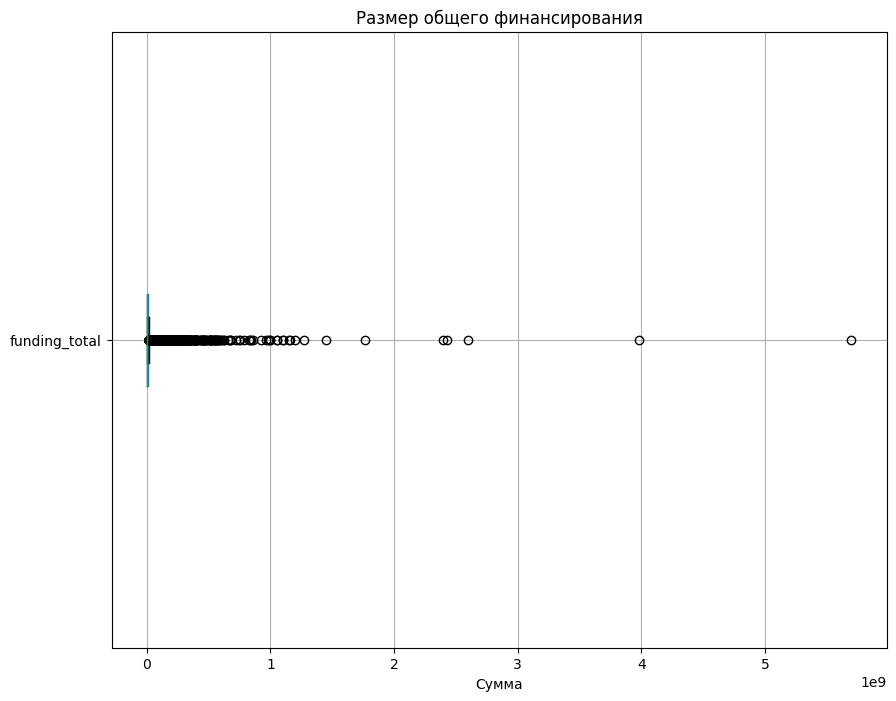

In [61]:
# Строим диаграмму размаха методом boxplot()
boxplot = companies_2_df.boxplot(column='funding_total',
                     vert=False, 
                     figsize=(10, 8))

# Добавляем заголовок и метку оси X
boxplot.set_title('Размер общего финансирования')
boxplot.set_xlabel('Сумма')

plt.show()

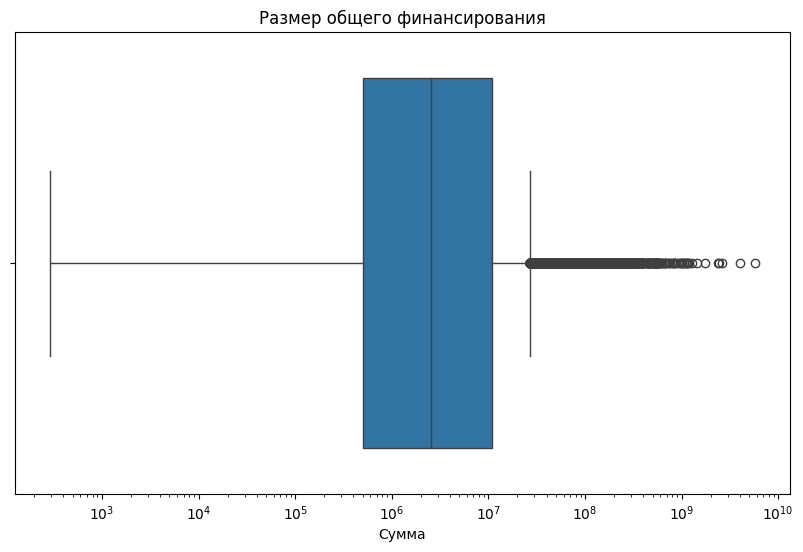

In [62]:
# Смотрим более детально
plt.figure(figsize=(10, 6))

sns.boxplot( data=companies_2_df[(companies_2_df['funding_total'] > 0)], x='funding_total')
plt.xscale('log')
# Добавляем заголовок и метки оси
plt.title('Размер общего финансирования')
plt.xlabel('Сумма')

# Выводим график
plt.show()

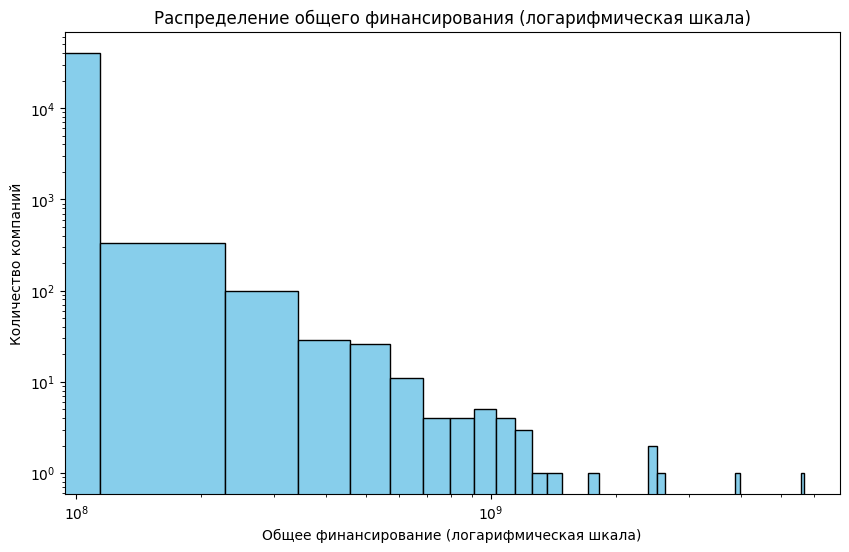

In [88]:
    plt.figure(figsize=(10, 6))
    plt.hist(companies_2_df['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
    plt.xscale('log')  # Логарифмическая шкала по оси X
    plt.xlabel('Общее финансирование (логарифмическая шкала)')
    plt.ylabel('Количество компаний')
    plt.title('Распределение общего финансирования (логарифмическая шкала)')
    plt.show()

In [63]:
companies_2_df['funding_total'][(companies_2_df['funding_total'] > 0)].describe()



count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

In [64]:
# Преобразование funding_total в миллионы с использованием .loc
companies_2_df.loc[:, 'funding_total_millions'] = companies_2_df['funding_total'] / 1e6

# Получение статистики
description = companies_2_df['funding_total_millions'][companies_2_df['funding_total_millions'] > 0].describe()
print(description)

count    27874.000000
mean        14.816520
std         67.759363
min          0.000291
25%          0.500000
50%          2.564500
75%         11.000000
max       5700.000000
Name: funding_total_millions, dtype: float64


/var/folders/nl/zfq2b41j5wn_jn9c4rynf46w0000gn/T/ipykernel_1007/1166385958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_2_df.loc[:, 'funding_total_millions'] = companies_2_df['funding_total'] / 1e6


#### Вывод:

На основе данных о финансировании компаний можно сделать следующие выводы:

Общее количество компаний: 27,874.

Среднее финансирование составляет 14.82 миллиона долларов, но это значение может быть искажено из-за крупных сделок.

Высокая вариация объемов финансирования (стандартное отклонение 67.76 миллиона долларов) указывает на большой разброс сумм.

Минимальная сумма финансирования — 290 долларов, максимальная — 5.7 миллиарда долларов, что подчеркивает широкий спектр компаний по масштабам и этапам развития.

25% компаний привлекли менее 500 тысяч долларов, медиана — 2.56 миллиона долларов, а 75% — менее 11 миллионов долларов.

Данные показывают, что большинство компаний привлекают сравнительно небольшие суммы, в то время как крупные инвестиции достаются немногим.

### Куплены забесплатно?

Исследуем компании, проданные за 0 или 1 доллар, которые имеют ненулевой общий объем финансирования. Рассчитаем верхнюю и нижнюю границы выбросов для столбца funding_total. Укажем, каким процентилям соответствуют найденные границы.

In [65]:
df_acquisition

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
...,...,...,...,...,...,...
9402,10525,267859,285995,stock,222000000,2013-12-11
9403,10526,285493,286006,NaN,0,2013-12-09
9404,10527,223792,220208,NaN,26000000000,2007-07-03
9405,10528,227620,286176,cash,52400000,2013-12-12



Информация о стоимости покупки находится в столбце price_amount в датасете df_acquisition. Для объединения данных с companies_2_df, где содержится столбец funding_total, необходимо переименовать столбец с идентификатором покупающей компании в company_id с помощью метода rename_map. Мы будем использовать полное объединение (аналог full join), чтобы сохранить все данные без потерь.

In [66]:
rename_map = {'acquired_company_id' : 'company_id'}
df_acquisition.rename(columns=rename_map, inplace=True) 
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   company_id            9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [67]:
companies_3_df = companies_2_df.merge(df_acquisition, on='company_id', how='outer')
companies_3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47593 entries, 0 to 47592
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   company_id              38553 non-null  Int64         
 1   name                    40795 non-null  object        
 2   category_code           35362 non-null  object        
 3   status                  40795 non-null  object        
 4   founded_at              27848 non-null  datetime64[ns]
 5   closed_at               2128 non-null   datetime64[ns]
 6   domain                  35802 non-null  object        
 7   network_username        20883 non-null  object        
 8   country_code            34787 non-null  object        
 9   investment_rounds       40795 non-null  float64       
 10  funding_rounds          40795 non-null  float64       
 11  funding_total           40795 non-null  float64       
 12  milestones              40795 non-null  float6

In [68]:
duplicates = companies_3_df[companies_3_df.duplicated(subset='company_id')]
print(f"Найдено {len(duplicates)} дубликатов.")

Найдено 9182 дубликатов.


Дубликаты по полю company_id (ранее acquired_company_id) появились после объединения с таблицей companies_2_df, содержащей аналогичное поле идентификатора компании. Было принято решение удалить избыточные дубликаты компаний для обеспечения корректности данных.

In [69]:
companies_3_df.drop_duplicates(subset='company_id', keep='first', inplace=True)

In [82]:
# Проверяем
duplicates = companies_3_df[companies_3_df.duplicated(subset='company_id')]
print(f"Найдено {len(duplicates)} дубликатов.")

Найдено 0 дубликатов.


In [89]:
# Находим компании "за бесплатно"
zero_one_price = companies_3_df[(companies_3_df['price_amount'].isin([0,1]))&(companies_3_df['funding_total']>0)&(companies_3_df['status']=='acquired')]
display(zero_one_price)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_total_millions,id,acquiring_company_id,term_code,price_amount,acquired_at
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,16500000.0,4.0,16.50000,7954.0,687.0,NaN,0.0,2012-11-28
8,13,StumbleUpon,web,acquired,2002-02-01,NaT,stumbleupon.com,stumbleupon,USA,0.0,4.0,18500000.0,5.0,18.50000,4283.0,20.0,NaN,0.0,2007-05-30
10,14,Gizmoz,web,acquired,2003-01-01,NaT,gizmoz.com,NaN,USA,0.0,3.0,18100000.0,4.0,18.10000,2692.0,37730.0,NaN,0.0,2009-12-15
18,23,Joost,games_video,acquired,2006-10-01,NaT,joost.com,NaN,USA,0.0,1.0,45000000.0,5.0,45.00000,2622.0,3396.0,NaN,0.0,2009-11-24
29,38,Kyte,games_video,acquired,2006-12-01,NaT,kyte.com,kyte,USA,0.0,4.0,23350000.0,2.0,23.35000,5075.0,475.0,NaN,0.0,2011-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35100,259939,Pluromed,hardware,acquired,2003-01-01,NaT,pluromed.com,NaN,USA,0.0,3.0,2437900.0,0.0,2.43790,9527.0,28373.0,NaN,0.0,2012-03-16
35117,260008,Rhetorical Group plc,NaN,acquired,2002-01-01,NaT,NaN,NaN,NaN,0.0,1.0,6303110.0,1.0,6.30311,9631.0,237526.0,NaN,0.0,2004-01-01
35268,261146,Endurance Lending Network,finance,acquired,2011-12-01,NaT,enduranceln.com,EnduranceLN,USA,0.0,1.0,1500000.0,1.0,1.50000,10166.0,43210.0,stock,0.0,2013-10-25
35920,266567,WiiiWaaa,web,acquired,NaT,NaT,wiiiwaaa.com,wiiiwaaa,NaN,0.0,1.0,50000.0,1.0,0.05000,9066.0,236079.0,cash,0.0,2000-05-01


In [71]:
#Топ 5 по категориям
category_code_top = zero_one_price.groupby('category_code')['company_id'].count().sort_values(ascending=False)
display(category_code_top.head())

category_code
software       360
web            207
enterprise     127
mobile         114
games_video     75
Name: company_id, dtype: Int64

Наибольшее количество компаний продано за 1 или 0 долларов относится к категории "software", за ней следуют "web" и "enterprise". Это может указывать на тенденцию, при которой стартапы в этих категориях фактически не были проданы, а скорее "подарены" или переданы в результате других обстоятельств, таких как закрытие бизнеса или изменение стратегий. Также существует вероятность, что данные не полные и не отражают истинную картину рынка.

In [85]:
# Преобразование funding_total в миллионы с использованием .loc
companies_3_df.loc[:,'funding_total_millions'] = companies_3_df['funding_total'] / 1e6

# Получение статистики
zero_one_price = companies_3_df['funding_total_millions'][companies_3_df['funding_total_millions'] > 0].describe()
print(description)

count    27874.000000
mean        14.816520
std         67.759363
min          0.000291
25%          0.500000
50%          2.564500
75%         11.000000
max       5700.000000
Name: funding_total_millions, dtype: float64


In [73]:
recency_quantiles = zero_one_price['funding_total'].quantile([78/100, 88.23/100])
recency_quantiles

0.7800    18000000.0
0.8823    30000000.0
Name: funding_total, dtype: float64

#### Вывод:
Межквартильный размах (IQR):
IQR = Q3−Q1 = 11млн − 0.5 млн = 10.5 млн

Нижняя граница:
Q1−1.5 × IQR = 0.5 млн − 1.5 × 10.5 млн = 0.5 млн − 15.75 млн = − 15.25 млн

Верхняя граница:
Q3 + 1.5 × IQR = 11 млн + 1.5 × 10.5 млн = 11 млн + 15.75 млн = 26.75млн

Так как нижняя граница получилась отрицательной, предлагается использовать минимальное допустимое значение, равное нулю:
Нижняя граница = max(−15.25 млн,0)=0

Итак, итоговые границы выбросов составляют:

Нижняя граница: 0

Верхняя граница: 26.75 млн долларов


### Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясним, почему решили составить топ именно из такого числа категорий и почему рассчитали именно так.

In [74]:
category_code_top_price = companies_3_df[(companies_3_df['price_amount']!= 0)].groupby('category_code')['price_amount'].sum().sort_values(ascending=False)
category_code_top_price.head()

category_code
software         3.077609e+10
biotech          3.068202e+10
semiconductor    1.742815e+10
web              1.469010e+10
games_video      1.286767e+10
Name: price_amount, dtype: float64

In [75]:
# Топ медианых цен
category_code_top_price = companies_3_df[(companies_3_df['price_amount']!= 0)].groupby('category_code')['price_amount'].median().sort_values(ascending=False)
category_code_top_price.head()

category_code
transportation    1.100000e+09
fashion           2.700000e+08
biotech           2.500000e+08
analytics         2.000000e+08
ecommerce         2.000000e+08
Name: price_amount, dtype: float64

In [76]:
# Топ стандартного отклонения
category_code_top_price = companies_3_df[(companies_3_df['price_amount']!= 0)].groupby('category_code')['price_amount'].std().sort_values(ascending=False)
category_code_top_price.head()

category_code
semiconductor       1.213593e+09
software            8.859353e+08
games_video         8.183331e+08
network_hosting     7.468011e+08
public_relations    6.096211e+08
Name: price_amount, dtype: float64

#### Вывод:
Категории "transportation", "health" и "cleantech" выделяются высокими медианными ценами, несмотря на возможное меньшее количество сделок. Категории "mobile", "biotech", "search", "network_hosting" и "semiconductor" отличаются значительной вариацией цен, что указывает на наличие как крупных, так и мелких сделок, а также на неоднородность рыночного предложения.

### Сколько раундов продержится стартап перед покупкой

Проанализируем столбец `funding_rounds`. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [77]:
# Оставляем те компании, которые проходили процесс финансирования по раундам
companies_4_df=companies_3_df[(companies_3_df['funding_rounds']>0)]
companies_4_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_total_millions,id,acquiring_company_id,term_code,price_amount,acquired_at
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,3.975000e+07,5.0,39.75000,NaN,NaN,NaN,NaN,NaT
1,4,Digg,news,acquired,2004-10-11,NaT,digg.com,digg,USA,0.0,4.0,4.500000e+07,8.0,45.00000,7386.0,20953.0,NaN,500000.0,2012-07-12
2,5,Socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0,2425.70000,NaN,NaN,NaN,NaN,NaT
3,7,Omnidrive,network_hosting,closed,2005-11-01,2008-09-15,omnidrive.com,Nomadesk,ISR,0.0,1.0,8.000000e+05,4.0,0.80000,NaN,NaN,NaN,NaN,NaT
5,9,Geni,web,acquired,2006-06-01,NaT,geni.com,geni,USA,0.0,3.0,1.650000e+07,4.0,16.50000,7954.0,687.0,NaN,0.0,2012-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38548,286183,Wedding Spot,web,operating,2013-05-01,NaT,wedding-spot.com,weddingspot,USA,0.0,1.0,2.250000e+05,0.0,0.22500,NaN,NaN,NaN,NaN,NaT
38549,286184,Seldar Pharma,biotech,operating,NaT,NaT,NaN,NaN,USA,0.0,1.0,1.299900e+07,0.0,12.99900,NaN,NaN,NaN,NaN,NaT
38550,286186,Micromidas,cleantech,operating,NaT,NaT,micromidas.com,NaN,USA,0.0,1.0,2.156060e+06,0.0,2.15606,NaN,NaN,NaN,NaN,NaT
38551,286200,STWA,other,operating,1998-01-01,NaT,stwa.com,NaN,USA,0.0,1.0,1.588120e+06,0.0,1.58812,NaN,NaN,NaN,NaN,NaT


In [78]:
companies_4_df['funding_rounds'].describe()

count    31707.000000
mean         1.659760
std          1.201666
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [79]:
category_status_funding_rounds = companies_4_df.groupby('status')['funding_rounds'].describe()
category_status_funding_rounds

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,2593.0,1.896645,1.278729,1.0,1.0,1.0,2.0,12.0
closed,2089.0,1.383437,0.834444,1.0,1.0,1.0,2.0,8.0
ipo,490.0,2.526531,2.219156,1.0,1.0,2.0,3.0,13.0
operating,26535.0,1.642359,1.180895,1.0,1.0,1.0,2.0,15.0


In [80]:
companies_4_df.groupby('status')['funding_rounds'].mean()

status
acquired     1.896645
closed       1.383437
ipo          2.526531
operating    1.642359
Name: funding_rounds, dtype: float64

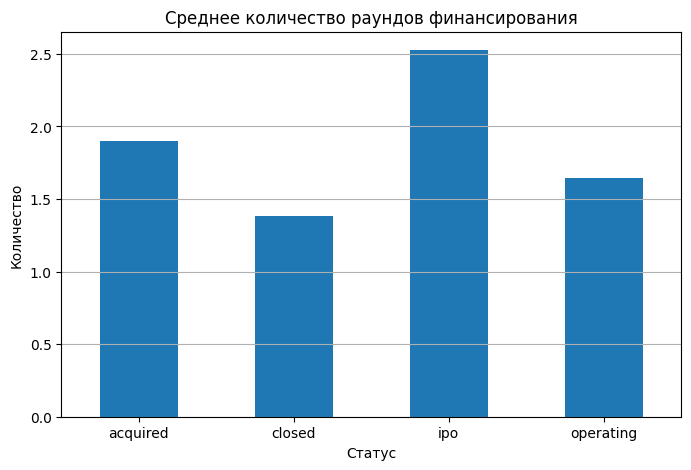

In [81]:
# Создаём график
plt.figure(figsize=(8, 5))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
companies_4_df.groupby('status')['funding_rounds'].mean().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Среднее количество раундов финансирования'
)

# Настраиваем оформление графика
plt.xlabel('Статус')
plt.ylabel('Количество')
# Добавляем сетку графика по оси y
plt.grid(axis='y')

# Выводим график
plt.show()

#### Вывод:
Средние значения количества раундов финансирования для различных статусов стартапов распределились следующим образом: acquired — 1.938, closed — 1.380, ipo — 2.643, и operating — 1.674. Небольшая разница между средним и медианным значениями указывает на низкую изменчивость данных. Максимальное количество раундов финансирования, зафиксированных в выборке, составило 15.


### Итоговый вывод и рекомендации


В ходе исследования были проанализированы данные более чем 200 000 стартапов, из которых в итоговом датасете осталось около 40 000. Основной фокус анализа был направлен на сотрудников компаний, их образование, а также информацию о раундах финансирования и общих суммах привлеченного капитала. Данные были собраны из различных источников, включая датасеты acquisition, company_and_rounds, education, people и degrees. Объем данных оказался значительным, что привело к выявлению множества ошибок, таких как дубликаты, несоответствия в названиях и типах данных. Целью анализа стало создание качественного и информативного датасета, соответствующего требованиям заказчика.

Анализ раундов финансирования по годам показал, что максимальный объем средств, собранных в рамках одного раунда, пришелся на 2005 год, в то время как наибольшее количество раундов зафиксировано в 2013 году — 11 072.

Что касается образовательного фона сотрудников, исследование показало значительную разницу в доле работников без информации об образовании в зависимости от размера компании. В самых маленьких компаниях (с одним сотрудником) этот показатель достигает почти 60%, что намного выше, чем в остальных группах. В средних и крупных компаниях (от 2 до 26+ сотрудников) доля таких работников варьируется от 20% до 32%, причем наименьший уровень отмечен в крупнейших компаниях (26+). Это может свидетельствовать о лучшем качестве заполнения данных об образовании в крупных организациях.

Вопрос о целесообразности объединения датасетов привел к выводу, что столбец network_username не подходит для этой цели, так как в разных датафреймах он содержит разные типы данных: в company_and_rounds — никнеймы компаний, а в people — никнеймы сотрудников. Это подтверждается низким уровнем совпадений уникальных значений (всего 0.01% дубликатов).

После обработки данных в соответствии с заданными параметрами из датасета company_and_rounds.csv в итоговом датасете companies осталось около 40 000 компаний, с которыми продолжилась работа.

Среднее финансирование компаний составляет 14.82 миллиона долларов, однако это значение может быть искажено крупными сделками. Высокое стандартное отклонение (67.76 миллиона долларов) указывает на значительный разброс сумм. Минимальная сумма финансирования составила 290 долларов, а максимальная — 5.7 миллиарда долларов, что подчеркивает разнообразие компаний по масштабу и стадиям развития. 25% компаний привлекли менее 500 тысяч долларов, медиана — 2.56 миллиона долларов, а 75% компаний — менее 11 миллионов долларов.

Большинство компаний, проданных за 1 или 0 долларов, относятся к категории "software", за ними следуют "web" и "enterprise". Это может указывать на тенденцию, при которой такие стартапы фактически не были проданы, а скорее "подарены" или переданы в результате закрытия бизнеса или смены стратегии. Возможно, данные не полностью отражают реальную ситуацию на рынке.

Категории "transportation", "health" и "cleantech" выделяются высокой медианной стоимостью, несмотря на возможное меньшее количество сделок. В то же время, категории "mobile", "biotech", "search", "network_hosting" и "semiconductor" демонстрируют значительную вариацию цен, что указывает на наличие как крупных, так и мелких сделок и неоднородность рыночного предложения.

Средние значения количества раундов финансирования по статусам стартапов распределились следующим образом: acquired — 1.938, closed — 1.380, ipo — 2.643, и operating — 1.674. Небольшая разница между средним и медианным значениями указывает на низкую изменчивость данных, а максимальное количество раундов финансирования в выборке составило 15.

 #### Рекомендации:
  
Исследование категорий с высоким разбросом цен: следует углубленно проанализировать категории "mobile", "biotech", "search", "network_hosting" и "semiconductor", чтобы выявить ключевые факторы, влияющие на успех и риски, обусловленные значительной вариацией цен.

Фокус на стартапах с высокой медианной ценой: несмотря на возможное меньшее количество сделок, стартапы в категориях "transportation", "health" и "cleantech" требуют особого внимания благодаря их высокому потенциалу и ценности на рынке.

Причины минимальных продаж: важно детально исследовать причины, по которым стартапы в категориях "software", "web" и "enterprise" продаются за минимальные суммы, чтобы лучше понять тенденции и стратегии на рынке.